In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
os.chdir('/content/drive/MyDrive/FEM')

In [3]:
import os

# Get the current directory path
current_directory = os.getcwd()

# Get a list of all files in the current directory
files = [f for f in os.listdir(current_directory) if os.path.isfile(os.path.join(current_directory, f))]

# Filter the files to include only text files
files = [f for f in files if f.endswith('.txt')]

# Sort the text files in ascending order
files.sort()

# Print the sorted list of files
print(files)


['r10_v20_miu00_cf.txt', 'r10_v20_miu00_ff.txt', 'r10_v20_miu05_cf.txt', 'r10_v20_miu05_ff.txt', 'r10_v40_miu00_cf.txt', 'r10_v40_miu00_ff.txt', 'r10_v40_miu05_cf.txt', 'r10_v40_miu05_ff.txt', 'r10_v80_miu00_cf.txt', 'r10_v80_miu00_ff.txt', 'r10_v80_miu05_cf.txt', 'r10_v80_miu05_ff.txt', 'r20_v20_miu00_cf.txt', 'r20_v20_miu00_ff.txt', 'r20_v20_miu05_cf.txt', 'r20_v20_miu05_ff.txt', 'r20_v40_miu00_cf.txt', 'r20_v40_miu00_ff.txt', 'r20_v40_miu05_cf.txt', 'r20_v40_miu05_ff.txt', 'r20_v80_miu00_cf.txt', 'r20_v80_miu00_ff.txt', 'r20_v80_miu05_cf.txt', 'r20_v80_miu05_ff.txt', 'r30_v20_miu00_cf.txt', 'r30_v20_miu00_ff.txt', 'r30_v20_miu05_cf.txt', 'r30_v20_miu05_ff.txt', 'r30_v40_miu00_cf.txt', 'r30_v40_miu00_ff.txt', 'r30_v40_miu05_cf.txt', 'r30_v40_miu05_ff.txt', 'r30_v80_miu00_cf.txt', 'r30_v80_miu00_ff.txt', 'r30_v80_miu05_cf.txt', 'r30_v80_miu05_ff.txt']


In [22]:
# Save Force Figure

import os
import numpy as np
import matplotlib.pyplot as plt

# Create the "figure" directory if it doesn't exist
if not os.path.exists("figure"):
    os.makedirs("figure")

# Loop through each file
for file in files:
    # Read the .txt file and skip the first three lines
    with open(file, 'r') as f:
        lines = f.readlines()[3:]  # Skip the first three lines
        data = [line.split() for line in lines if line.strip()]  # Split the lines into columns

    # Convert the data to a numpy array, skipping any non-numeric values
    try:
        data = np.array(data, dtype=float)
    except ValueError:
        print(f"Skipping file: {file} (contains non-numeric values)")
        continue

    # Extract the Time and Force columns
    time = data[:, 0]
    force = -data[:, 1]

    # Plot the data
    plt.plot(time, force)
    plt.xlabel('Time')
    plt.ylabel('Force')
    plt.title('Force vs. Time')
    plt.grid(True)

    # Save the plot in the "figure" directory
    filename = os.path.join("figure", file.replace('.txt', '.png'))
    plt.savefig(filename)  # Save as PNG format
    # Alternatively, you can save in other formats such as PDF, JPEG, etc.
    # plt.savefig(filename.replace('.png', '.pdf'))  # Save as PDF format

    # Clear the plot for the next iteration
    plt.clf()

# Print a message indicating the saving process is complete
print("Plots saved for all files in the 'figure' directory.")


Plots saved for all files in the 'figure' directory.


<Figure size 640x480 with 0 Axes>

In [22]:
len(files)

36

In [4]:
# Assign five attributes and create a DataFrame

import numpy as np
import pandas as pd

def parse_filename(filename):
    name = filename.split('.')[0]  # remove file extension
    parts = name.split('_')  # split the name on underscore

    tool_radius = int(parts[0][1:])
    cutting_speed = int(parts[1][1:])
    friction = int(parts[2][3:])
    force_type = parts[3]

    return tool_radius, cutting_speed, friction, force_type
def compute_average_force(filename):
    data = np.loadtxt(filename, skiprows=3)
    time = data[:, 0]
    force = data[:, 1]

    quarter_length = len(time) // 4
    force = force[quarter_length:-quarter_length]  # Discard first and last quarter

    return -np.mean(force)

data = []

for file in files:
    tool_radius, cutting_speed, friction, force_type = parse_filename(file)
    average_force = compute_average_force(file)

    row = [file, tool_radius, cutting_speed, friction, force_type, average_force]
    data.append(row)

df = pd.DataFrame(data, columns=['file', 'tool_radius', 'cutting_speed', 'friction', 'force_type', 'average_force'])


In [21]:
df


,file,tool_radius,cutting_speed,friction,force_type,average_force,chip_thickness
0,r10_v20_miu00_cf.txt,10,20,0,cf,214.504681,0.220
1,r10_v20_miu00_ff.txt,10,20,0,ff,13.936000,0.220
2,r10_v20_miu05_cf.txt,10,20,5,cf,283.343403,0.212
3,r10_v20_miu05_ff.txt,10,20,5,ff,109.476837,0.212
4,r10_v40_miu00_cf.txt,10,40,0,cf,209.847077,0.210
5,r10_v40_miu00_ff.txt,10,40,0,ff,16.111594,0.210
6,r10_v40_miu05_cf.txt,10,40,5,cf,271.697688,0.210
7,r10_v40_miu05_ff.txt,10,40,5,ff,102.337273,0.210
8,r10_v80_miu00_cf.txt,10,80,0,cf,207.446097,0.200
9,r10_v80_miu00_ff.txt,10,80,0,ff,18.810346,0.200


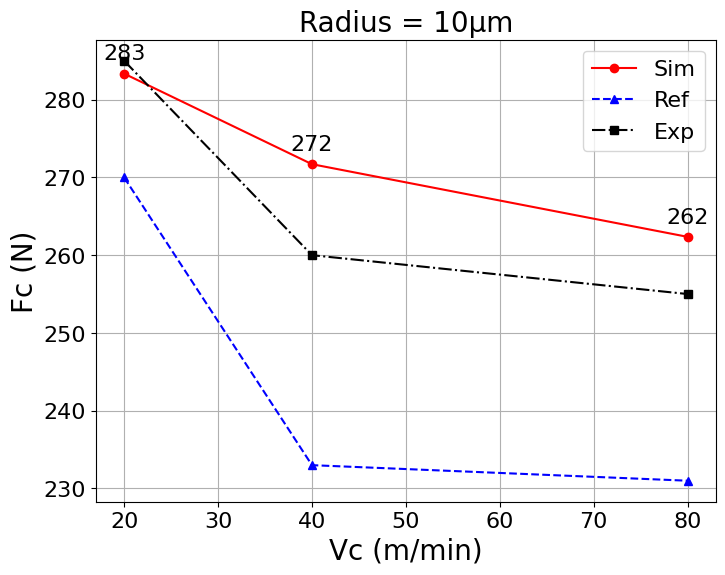

In [25]:
# Different radius, Vc-Fc

import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame named 'df'
df_filtered = df[(df['tool_radius'] == 10) & (df['friction'] == 5) & (df['force_type'] == 'cf')]

simulated = df_filtered[['cutting_speed', 'average_force']]
simulated = simulated.sort_values('cutting_speed')  # Sort the data by cutting_speed

# Reference and Experimental data
# radius=10
ref = pd.DataFrame({'cutting_speed': [20, 40, 80], 'average_force': [270, 233, 231]})
exp = pd.DataFrame({'cutting_speed': [20, 40, 80], 'average_force': [285, 260, 255]})

# radius=20
# ref = pd.DataFrame({'cutting_speed': [20, 40, 80], 'average_force': [288, 260, 258]})
# exp = pd.DataFrame({'cutting_speed': [20, 40, 80], 'average_force': [263, 232, 243]})

# radius=30
# ref = pd.DataFrame({'cutting_speed': [20, 40, 80], 'average_force': [292, 280, 263]})
# exp = pd.DataFrame({'cutting_speed': [20, 40, 80], 'average_force': [255, 245, 247]})

# Plotting
plt.figure(figsize=(8, 6))

plt.plot(simulated['cutting_speed'], simulated['average_force'], 'ro-', label='Sim')
for x, y in zip(simulated['cutting_speed'], simulated['average_force']):
    label = "{:.0f}".format(y)
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=16)

plt.plot(ref['cutting_speed'], ref['average_force'], 'b^--', label='Ref')
plt.plot(exp['cutting_speed'], exp['average_force'], 'ks-.', label='Exp')

plt.xlabel('Vc (m/min)', fontsize=20)
plt.ylabel('Fc (N)', fontsize=20)
plt.title(f"Radius = {df_filtered['tool_radius'].iloc[0]}μm", fontsize=20)
plt.grid(True)
plt.legend(fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()


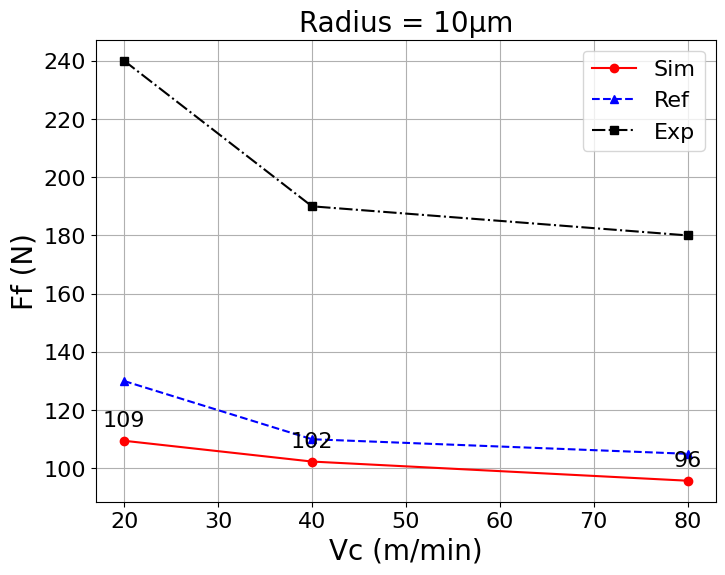

In [28]:
# Different radius, Vc-Ff

import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame named 'df'
df_filtered = df[(df['tool_radius'] == 10) & (df['friction'] == 5) & (df['force_type'] == 'ff')]

simulated = df_filtered[['cutting_speed', 'average_force']]
simulated = simulated.sort_values('cutting_speed')  # Sort the data by cutting_speed

# Reference and Experimental data
# radius=10
ref = pd.DataFrame({'cutting_speed': [20, 40, 80], 'average_force': [130, 110, 105]})
exp = pd.DataFrame({'cutting_speed': [20, 40, 80], 'average_force': [240, 190, 180]})

# radius=20
# ref = pd.DataFrame({'cutting_speed': [20, 40, 80], 'average_force': [140, 118, 121]})
# exp = pd.DataFrame({'cutting_speed': [20, 40, 80], 'average_force': [260, 222, 230]})

# radius=30
# ref = pd.DataFrame({'cutting_speed': [20, 40, 80], 'average_force': [144, 145, 138]})
# exp = pd.DataFrame({'cutting_speed': [20, 40, 80], 'average_force': [270, 250, 250]})

# Plotting
plt.figure(figsize=(8, 6))

plt.plot(simulated['cutting_speed'], simulated['average_force'], 'ro-', label='Sim')
for x, y in zip(simulated['cutting_speed'], simulated['average_force']):
    label = "{:.0f}".format(y)
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=16)

plt.plot(ref['cutting_speed'], ref['average_force'], 'b^--', label='Ref')
plt.plot(exp['cutting_speed'], exp['average_force'], 'ks-.', label='Exp')

plt.xlabel('Vc (m/min)', fontsize=20)
plt.ylabel('Ff (N)', fontsize=20)
plt.title(f"Radius = {df_filtered['tool_radius'].iloc[0]}μm", fontsize=20)
plt.grid(True)
plt.legend(fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()


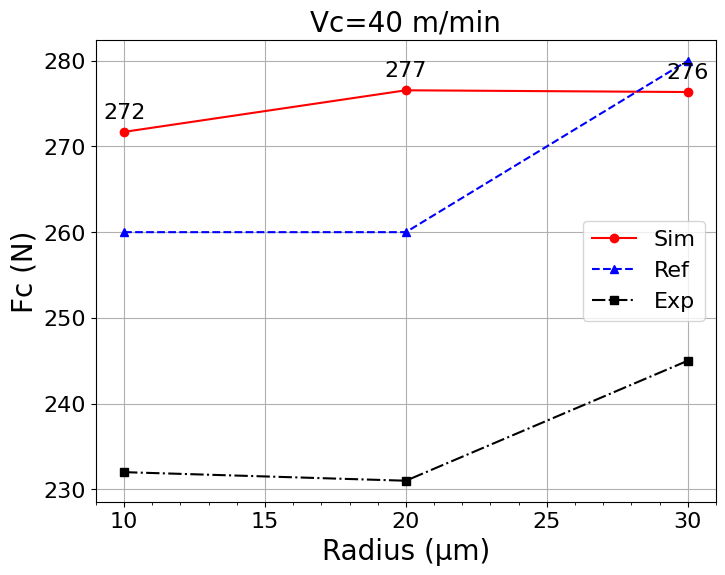

In [30]:
# Different Vc, radius-Fc

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Assuming your data is in a pandas DataFrame named 'df'
df_filtered = df[(df['cutting_speed'] == 40) & (df['friction'] == 5) & (df['force_type'] == 'cf')]

simulated = df_filtered[['tool_radius', 'average_force']]
simulated = simulated.sort_values('tool_radius')  # Sort the data by tool_radius

# Reference and Experimental data
# v = 20
# ref = pd.DataFrame({'tool_radius': [10, 20, 30], 'average_force': [285, 287, 291]})
# exp = pd.DataFrame({'tool_radius': [10, 20, 30], 'average_force': [270, 265, 255]})
# v=40
ref = pd.DataFrame({'tool_radius': [10, 20, 30], 'average_force': [260, 260, 280]})
exp = pd.DataFrame({'tool_radius': [10, 20, 30], 'average_force': [232, 231, 245]})
# v=80
# ref = pd.DataFrame({'tool_radius': [10, 20, 30], 'average_force': [254, 257, 260]})
# exp = pd.DataFrame({'tool_radius': [10, 20, 30], 'average_force': [232, 243, 247]})


# Plotting
plt.figure(figsize=(8, 6))

plt.plot(simulated['tool_radius'], simulated['average_force'], 'ro-', label='Sim')
for x, y in zip(simulated['tool_radius'], simulated['average_force']):
    label = "{:.0f}".format(y)
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=16)

plt.plot(ref['tool_radius'], ref['average_force'], 'b^--', label='Ref')
plt.plot(exp['tool_radius'], exp['average_force'], 'ks-.', label='Exp')

plt.xlabel('Radius (μm)', fontsize=20)
plt.ylabel('Fc (N)', fontsize=20)
plt.title(f"Vc={df_filtered['cutting_speed'].iloc[0]} m/min", fontsize=20)
plt.grid(True)
plt.legend(fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))  # Set major xticks at every 5 units
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(1))  # Set minor xticks at every 1 unit

plt.show()


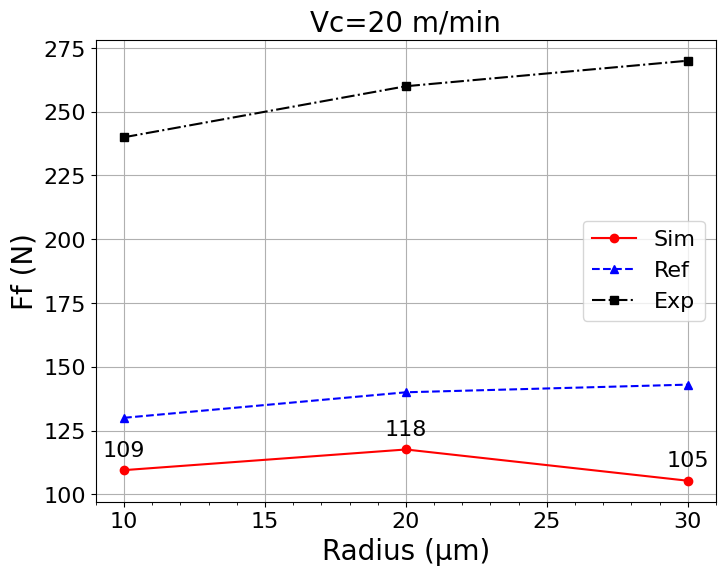

In [116]:
# Different Vc, radius-Ff

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Assuming your data is in a pandas DataFrame named 'df'
df_filtered = df[(df['cutting_speed'] == 20) & (df['friction'] == 5) & (df['force_type'] == 'ff')]

simulated = df_filtered[['tool_radius', 'average_force']]
simulated = simulated.sort_values('tool_radius')  # Sort the data by tool_radius

# Reference and Experimental data
# v = 20
ref = pd.DataFrame({'tool_radius': [10, 20, 30], 'average_force': [130, 140, 143]})
exp = pd.DataFrame({'tool_radius': [10, 20, 30], 'average_force': [240, 260, 270]})
# v=40
# ref = pd.DataFrame({'tool_radius': [10, 20, 30], 'average_force': [110, 120, 142]})
# exp = pd.DataFrame({'tool_radius': [10, 20, 30], 'average_force': [190, 220, 260]})
# v=80
# ref = pd.DataFrame({'tool_radius': [10, 20, 30], 'average_force': [105, 120, 138]})
# exp = pd.DataFrame({'tool_radius': [10, 20, 30], 'average_force': [180, 238, 252]})


# Plotting
plt.figure(figsize=(8, 6))

plt.plot(simulated['tool_radius'], simulated['average_force'], 'ro-', label='Sim')
for x, y in zip(simulated['tool_radius'], simulated['average_force']):
    label = "{:.0f}".format(y)
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=16)

plt.plot(ref['tool_radius'], ref['average_force'], 'b^--', label='Ref')
plt.plot(exp['tool_radius'], exp['average_force'], 'ks-.', label='Exp')

plt.xlabel('Radius (μm)', fontsize=20)
plt.ylabel('Ff (N)', fontsize=20)
plt.title(f"Vc={df_filtered['cutting_speed'].iloc[0]} m/min", fontsize=20)
plt.grid(True)
plt.legend(fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))  # Set major xticks at every 5 units
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(1))  # Set minor xticks at every 1 unit

plt.show()


In [8]:
# Assign chip thickness as the 6th attribute of df

chip_thickness = [
    0.22, 0.22, 0.212, 0.212, 0.21, 0.21, 0.21, 0.21, 0.2, 0.2, 0.2, 0.2, 0.22, 0.22,
    0.171, 0.171, 0.211, 0.211, 0.156, 0.156, 0.199, 0.199, 0.147, 0.147, 0.215, 0.215,
    0.158, 0.158, 0.213, 0.213, 0.156, 0.156, 0.188, 0.188, 0.15, 0.15
]

df = df.assign(chip_thickness=chip_thickness)


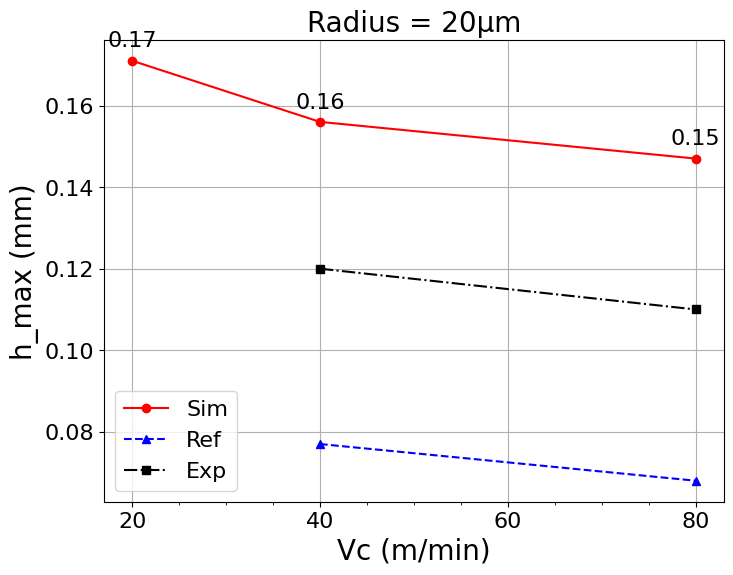

In [11]:
# Different radius, Vc-h_max

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Assuming your data is in a pandas DataFrame named 'df'
df_filtered = df[(df['tool_radius'] == 20) & (df['friction'] == 5) & (df['force_type'] == 'cf')]

simulated = df_filtered[['cutting_speed', 'chip_thickness']]
simulated = simulated.sort_values('cutting_speed')  # Sort the data by cutting_speed

# Reference and Experimental data
# radius = 10
# ref = pd.DataFrame({'cutting_speed': [40, 80], 'chip_thickness': [0.08, 0.073]})
# exp = pd.DataFrame({'cutting_speed': [40, 80], 'chip_thickness': [0.13, 0.11]})
# radius = 20
ref = pd.DataFrame({'cutting_speed': [40, 80], 'chip_thickness': [0.077, 0.068]})
exp = pd.DataFrame({'cutting_speed': [40, 80], 'chip_thickness': [0.12, 0.11]})

# Plotting
plt.figure(figsize=(8, 6))

plt.plot(simulated['cutting_speed'], simulated['chip_thickness'], 'ro-', label='Sim')
for x, y in zip(simulated['cutting_speed'], simulated['chip_thickness']):
    label = "{:.2f}".format(y)
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=16)

plt.plot(ref['cutting_speed'], ref['chip_thickness'], 'b^--', label='Ref')
plt.plot(exp['cutting_speed'], exp['chip_thickness'], 'ks-.', label='Exp')

plt.xlabel('Vc (m/min)', fontsize=20)
plt.ylabel('h_max (mm)', fontsize=20)
plt.title(f"Radius = {df_filtered['tool_radius'].iloc[0]}μm", fontsize=20)
plt.grid(True)
plt.legend(fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(20))  # Set major xticks at every 20 units
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(5))  # Set minor xticks at every 5 units

plt.show()


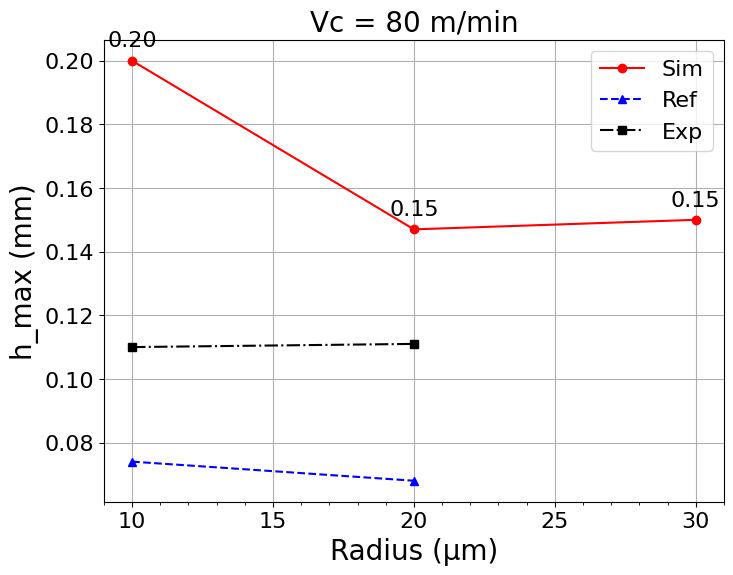

In [13]:
# Different Vc, Radius-h_max

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Assuming your data is in a pandas DataFrame named 'df'
df_filtered = df[(df['cutting_speed'] == 80) & (df['friction'] == 5) & (df['force_type'] == 'cf')]

simulated = df_filtered[['tool_radius', 'chip_thickness']]
simulated = simulated.sort_values('tool_radius')  # Sort the data by tool_radius

# Reference and Experimental data
# v = 40
# ref = pd.DataFrame({'tool_radius': [10, 20], 'chip_thickness': [0.079, 0.077]})
# exp = pd.DataFrame({'tool_radius': [10, 20], 'chip_thickness': [0.13, 0.12]})
# v = 80
ref = pd.DataFrame({'tool_radius': [10, 20], 'chip_thickness': [0.074, 0.068]})
exp = pd.DataFrame({'tool_radius': [10, 20], 'chip_thickness': [0.11, 0.111]})

# Plotting
plt.figure(figsize=(8, 6))

plt.plot(simulated['tool_radius'], simulated['chip_thickness'], 'ro-', label='Sim')
for x, y in zip(simulated['tool_radius'], simulated['chip_thickness']):
    label = "{:.2f}".format(y)
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=16)

plt.plot(ref['tool_radius'], ref['chip_thickness'], 'b^--', label='Ref')
plt.plot(exp['tool_radius'], exp['chip_thickness'], 'ks-.', label='Exp')

plt.xlabel('Radius (μm)', fontsize=20)
plt.ylabel('h_max (mm)', fontsize=20)
plt.title(f"Vc = {df_filtered['cutting_speed'].iloc[0]} m/min", fontsize=20)
plt.grid(True)
plt.legend(fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))  # Set major xticks at every 5 units
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(1))  # Set minor xticks at every 1 unit
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:d}'.format(int(x)) if x in [10, 15, 20, 25, 30] else ''))

plt.show()
